In [14]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#### Diagram 1: Learning curves for Ablation 3's best (030225-expt1) and Ablation 4

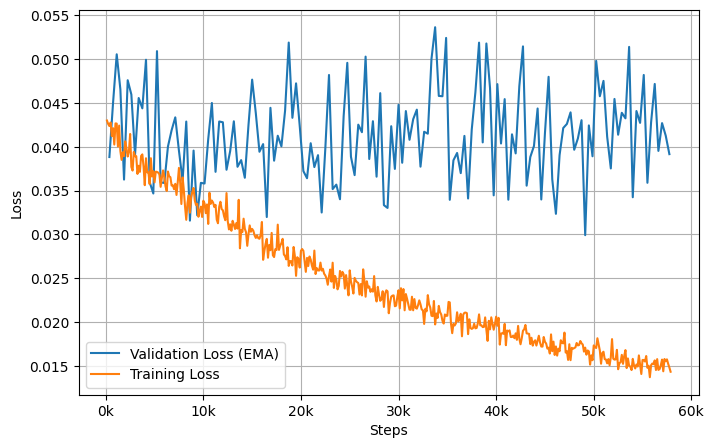

In [ ]:
log_parent_dir = os.path.join(os.getcwd(), "..", "logs", "030225-expt1")
train_loss_hist = os.path.join(log_parent_dir, "030225-expt1-train_loss_hist.csv")
train_loss_hist_df = pd.read_csv(train_loss_hist)
val_loss_ema_hist = os.path.join(log_parent_dir, "030225-expt1-val_loss_ema_hist.csv")
val_loss_ema_hist_df = pd.read_csv(val_loss_ema_hist)

plt.figure(figsize=(8, 5))
plt.plot(val_loss_ema_hist_df["Step"], val_loss_ema_hist_df["Value"], label="Validation Loss (EMA)")
plt.plot(train_loss_hist_df["Step"], train_loss_hist_df["Value"], label="Training Loss")

# Format x-axis ticks as 10k, 20k, 30k
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x/1000)}k"))

plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

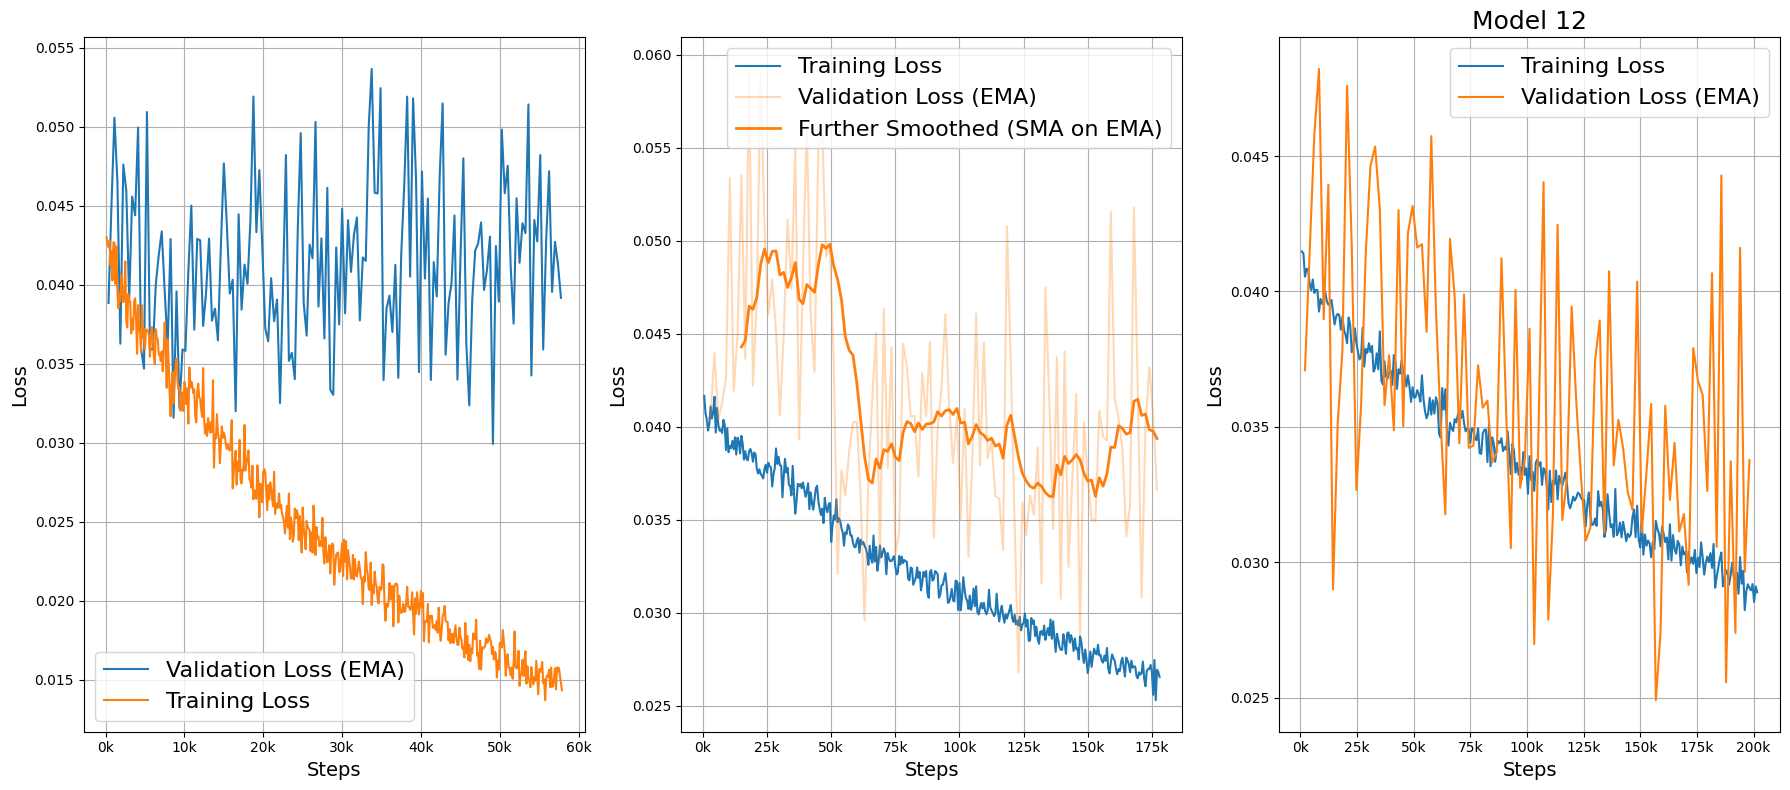

In [ ]:
# model 11 refers to 030225-expt2 while model 12 refers to 050225-expt1

# ------------------- model 10
log_parent_dir = os.path.join(os.getcwd(), "..", "logs", "030225-expt1")
train_loss_hist = os.path.join(log_parent_dir, "030225-expt1-train_loss_hist.csv")
train_loss_hist_df = pd.read_csv(train_loss_hist)
val_loss_ema_hist = os.path.join(log_parent_dir, "030225-expt1-val_loss_ema_hist.csv")
val_loss_ema_hist_df = pd.read_csv(val_loss_ema_hist)

# ----------------------------
model_11_train_loss_fps = [f"030225-expt2-pt{i+1}-train_loss.csv" for i in range(2)]
model_11_val_loss_ema_fps = [f"030225-expt2-pt{i+1}-val_loss_ema.csv" for i in range(2)]

model_12_train_loss_fps = [f"050225-expt1-pt{i+1}-train_loss.csv" for i in range(4)]
model_12_val_loss_ema_fps = [f"050225-expt1-pt{i+1}-val_loss_ema.csv" for i in range(4)]

def combine_expt_parts(expt_csvs):

    res_values = []
    res_steps = []
    max_step = 0
    for fp in expt_csvs:
        res_df = pd.read_csv(fp)
        res_values.extend(list(res_df["Value"]))
        part_steps = list(res_df["Step"])
        steps = [max_step + step for step in part_steps]
        res_steps.extend(steps)
        max_step = max(max_step, max(steps))    
    return res_values, res_steps

def simple_moving_average(values, window_size=10):
    """Compute simple moving average (SMA) for smoother visualization."""
    return np.convolve(values, np.ones(window_size) / window_size, mode='valid')

# -------------------- model 11
model_11_train_losses_values, model_11_train_losses_steps = combine_expt_parts(model_11_train_loss_fps)
model_11_val_losses_ema_values, model_11_val_losses_ema_steps = combine_expt_parts(model_11_val_loss_ema_fps)

# ------------------ model 12
model_12_train_losses_values, model_12_train_losses_steps = combine_expt_parts(model_12_train_loss_fps)
model_12_val_losses_ema_values, model_12_val_losses_ema_steps = combine_expt_parts(model_12_val_loss_ema_fps)

window_size = 10  # Adjust for more/less smoothing
fig, axs = plt.subplots(1,3,figsize=(18,8))

axs[0].plot(val_loss_ema_hist_df["Step"], val_loss_ema_hist_df["Value"], label="Validation Loss (EMA)")
axs[0].plot(train_loss_hist_df["Step"], train_loss_hist_df["Value"], label="Training Loss")
# Format x-axis ticks as 10k, 20k, 30k
axs[2].set_title("Model 10", fontsize=18)
axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x/1000)}k"))
axs[0].set_xlabel("Steps", fontsize=14)
axs[0].set_ylabel("Loss", fontsize=14)
axs[0].legend(fontsize=16)
axs[0].grid(True)

axs[1].plot(model_11_train_losses_steps, model_11_train_losses_values, label="Training Loss",color='C0')
axs[1].plot(model_11_val_losses_ema_steps, model_11_val_losses_ema_values, label="Validation Loss (EMA)", alpha=0.3, color='C1')

# Apply SMA on the already computed EMA-smoothed validation loss
smoothed_val_losses = simple_moving_average(model_11_val_losses_ema_values, window_size)
# Adjust steps to match the length of smoothed values
smoothed_steps = model_11_val_losses_ema_steps[len(model_11_val_losses_ema_steps) - len(smoothed_val_losses):]
axs[1].plot(smoothed_steps, smoothed_val_losses, label="Further Smoothed (SMA on EMA)", linewidth=2, color='C1')

# Format x-axis ticks as 10k, 20k, 30k
axs[2].set_title("Model 11", fontsize=18)
axs[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x/1000)}k"))
axs[1].set_xlabel("Steps", fontsize=14)
axs[1].set_ylabel("Loss", fontsize=14)
axs[1].legend(fontsize=16)
axs[1].grid(True)

axs[2].plot(model_12_train_losses_steps, model_12_train_losses_values, label="Training Loss")
axs[2].plot(model_12_val_losses_ema_steps, model_12_val_losses_ema_values, label="Validation Loss (EMA)")

window_size = 10  # Adjust for more/less smoothing
smoothed_val_losses = simple_moving_average(model_12_val_losses_ema_values, window_size)
# Adjust steps to match the length of smoothed values
smoothed_steps = model_12_val_losses_ema_steps[len(model_12_val_losses_ema_steps) - len(smoothed_val_losses):]

# Format x-axis ticks as 10k, 20k, 30k
axs[2].set_title("Model 12", fontsize=18)
axs[2].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x/1000)}k"))
axs[2].set_xlabel("Steps", fontsize=14)
axs[2].set_ylabel("Loss", fontsize=14)
axs[2].legend(fontsize=16)
axs[2].grid(True)

plt.tight_layout()

#### Diagram 2: Diagram comparing scores of all ablations

In [2]:
metrics_consolidated_fp = os.path.join(os.getcwd(), "..", "logs", "metrics-consolidated.csv")
metrics_consolidated_df = pd.read_csv(metrics_consolidated_fp)
metrics_consolidated_df

,run_name,ablation,config_name,ssim,fid,lpips
0,cfld-baseline-metrics-2,baseline,cfld-baseline,0.660326,0.195212,0.182997
1,pidm-baseline-metrics,baseline,pidm-baseline,0.656120,0.390077,0.183632
2,controlip-baseline-metrics,baseline,controlip-baseline,0.565504,7.249944,0.234051
3,011224-expt4-metrics,baseline,visconet_baseline_baselinetest,0.401288,9.787727,0.305664
4,011224-expt1-metrics,1,visconet_v5_pair,0.417635,9.127215,0.296551
5,011224-expt2-metrics,1,visconet_v6_pair,0.411117,9.492251,0.300173
6,011224-expt3-metrics,1,visconet_v7_pair,0.424046,8.425817,0.300849
7,150125-expt1-metrics-whitebg,2,visconet_v8_pair,0.463421,6.197201,0.271263
8,150125-expt1-metrics,2,visconet_v8_pair,0.451367,6.917712,0.277920
9,190125-expt1-metrics,2,visconet_v9_pair,0.459755,6.524510,0.270591


In [3]:
published_baselines_df = metrics_consolidated_df[(metrics_consolidated_df["run_name"].str.startswith("cfld")) |\
                                                 (metrics_consolidated_df["run_name"].str.startswith("pidm"))]
published_baselines_df.head()

,run_name,ablation,config_name,ssim,fid,lpips
0,cfld-baseline-metrics-2,baseline,cfld-baseline,0.660326,0.195212,0.182997
1,pidm-baseline-metrics,baseline,pidm-baseline,0.656120,0.390077,0.183632


In [4]:
starting_baselines_df = metrics_consolidated_df[(metrics_consolidated_df["run_name"].str.startswith("controlip")) |\
                                                (metrics_consolidated_df["run_name"] == "011224-expt4-metrics")]
starting_baselines_df.head()

,run_name,ablation,config_name,ssim,fid,lpips
2,controlip-baseline-metrics,baseline,controlip-baseline,0.565504,7.249944,0.234051
3,011224-expt4-metrics,baseline,visconet_baseline_baselinetest,0.401288,9.787727,0.305664


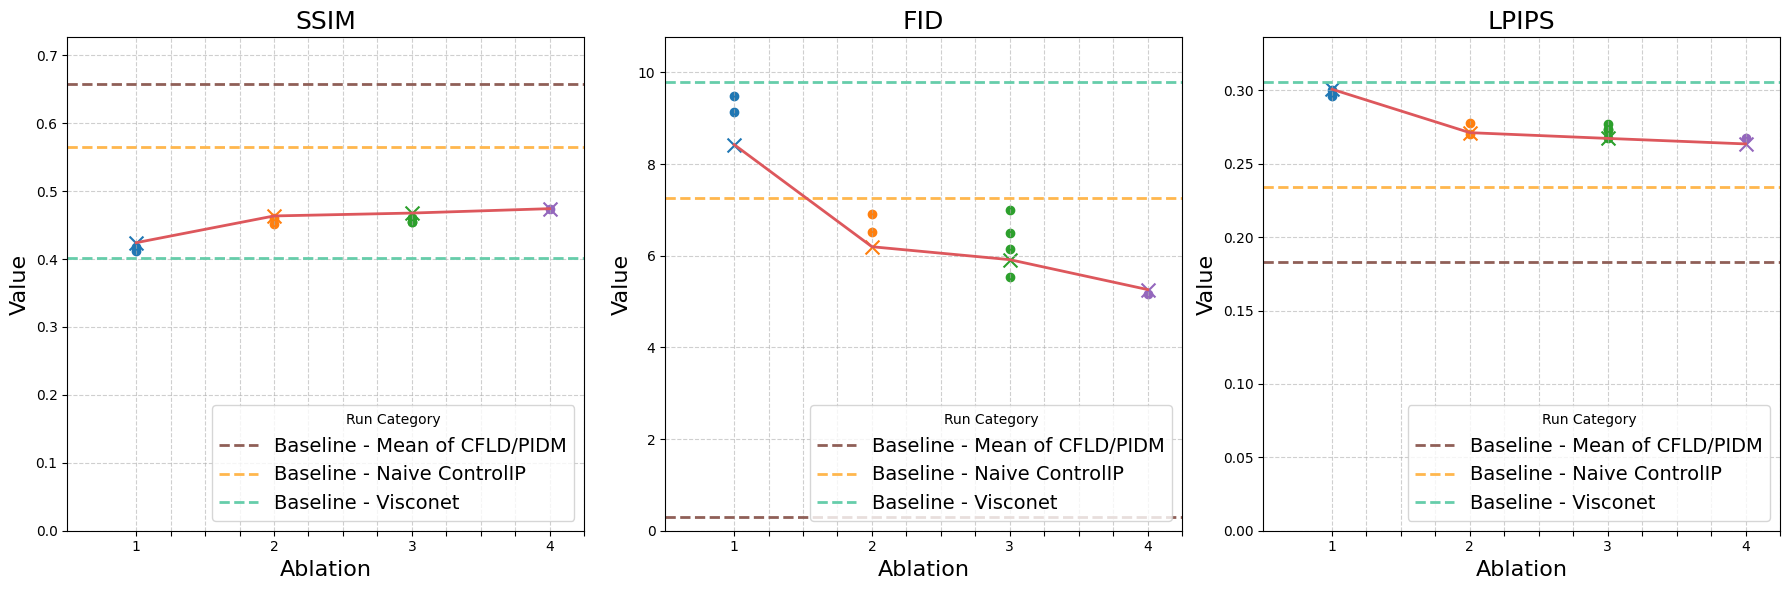

In [ ]:
df = metrics_consolidated_df.copy()

best_results = {
    "1": "011224-expt3-metrics",
    "2": "150125-expt1-metrics-whitebg",
    "3": "030225-expt1-metrics",
    "4": "050225-expt1-metrics"
}

published_baselines = ["cfld-baseline-metrics-2", "pidm-baseline-metrics"]
own_baselines = ["controlip-baseline-metrics", "011224-expt4-metrics"]

non_baseline_df = df[df["ablation"] != "baseline"]
ablations = non_baseline_df["ablation"].unique()

colours = ['C0', 'C1', 'C2', 'C4']
metrics_lists = ["ssim", "fid", "lpips"]
# Create subplots (1 row, 3 columns)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, metrics in enumerate(metrics_lists):
    ax = axs[i]  # Get the specific subplot

    published_baselines_mean = df[df["run_name"].isin(published_baselines)][metrics].mean()
    best_runs = []

    for abl in ablations:
        ablation_runs = non_baseline_df[non_baseline_df["ablation"] == abl]
        best_abl_run = ablation_runs[ablation_runs["run_name"] == best_results[abl]]
        other_runs = ablation_runs[ablation_runs["run_name"] != best_results[abl]]
        best_abl_val = best_abl_run[metrics].values.item()
        best_runs.append(best_abl_val)
        ax.scatter(x=[int(abl)], y=[best_abl_val], s=100, color=colours[int(abl)-1], marker='x')
        ax.scatter(x=[int(abl) for _ in range(len(other_runs))], y=other_runs[metrics], color=colours[int(abl)-1])

    ax.axhline(y=published_baselines_mean, color="#8f5f57", linestyle='--', linewidth=2, label="Baseline - Mean of CFLD/PIDM")

    controlip_baseline_score = df[df['run_name'] == "controlip-baseline-metrics"][metrics].values
    visconet_baseline_score = df[df['run_name'] == "011224-expt4-metrics"][metrics].values

    ax.axhline(y=controlip_baseline_score, color="#FFB74D", linestyle='--', linewidth=2, label="Baseline - Naive ControlIP")   
    ax.axhline(y=visconet_baseline_score, color="#66cdaa", linestyle='--', linewidth=2, label="Baseline - Visconet")
    
    ax.plot([int(abl) for abl in ablations], best_runs, linewidth=2, color='#dd575c')

    max_y = df[metrics].max()
    ax.set_ylim(0, max_y * 1.1)
    ax.set_xlim(0.5, 3.5)

    major_ticks = np.arange(1, 4.5, 0.25)
    ax.set_xticks(major_ticks)

    # Only label 1, 2, and 3
    labels = {1: "1", 2: "2", 3: "3", 4: "4"}
    ax.set_xticklabels([labels.get(tick, "") for tick in major_ticks])

    ax.legend(title="Run Category", loc="lower right", fontsize=14)  # Increase legend font size
    ax.set_xlabel("Ablation", fontsize=16)  # Increase axis label font size
    ax.set_ylabel("Value", fontsize=16)  # Increase axis label font size
    ax.set_title(f"{metrics_lists[i].upper()}", fontsize=18)  # Increase title font size
    ax.grid(True, which="both", linestyle="--", alpha=0.6)  # Keep minor grid

# Adjust layout so subplots don't overlap
plt.tight_layout()
plt.show()